In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing dataset

In [2]:
dftr = pd.read_excel('Data_Train.xlsx')

In [3]:
dftr.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [4]:
dftr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
dftr.dropna(inplace=True)

In [6]:
dftr.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA

In [7]:
dftr['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

In [8]:
# Extracting Date, Month and Year from the Date of Journey

from datetime import datetime
dftr['Year'] = pd.to_datetime(dftr['Date_of_Journey']).dt.year
dftr['Month'] = pd.to_datetime(dftr['Date_of_Journey']).dt.month
dftr['Date'] = pd.to_datetime(dftr['Date_of_Journey']).dt.day

In [9]:
dftr.drop(['Date_of_Journey'],axis=1,inplace=True)

In [10]:
dftr.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Date
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3


In [151]:
dftr['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Name: Airline, dtype: int64

In [15]:
# Duration is 5m for a 2 stop flight which is impossible
# Removing this outlier

dftr[dftr['Duration']=='5m']

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Date
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2 stops,No info,17327,2019,6,3


In [16]:
dftr.drop([6474,],axis=0,inplace=True)

In [17]:
dftr.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Date
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3


In [18]:
# Extracting Dur_hours and Dur_min from the Duration Column

dftr['Dur_hours'] = dftr['Duration'].str.split(' ').str[0]
dftr['Dur_hours'] = dftr['Dur_hours'].str.replace('h','').astype(float)
dftr['Dur_hours'].fillna(0, inplace=True) 

dftr['Dur_min'] = dftr['Duration'].str.split(' ').str[1]
dftr['Dur_min'] = dftr['Dur_min'].str.replace('m','').astype(float)
dftr['Dur_min'].fillna(0, inplace=True)

In [19]:
dftr.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Date,Dur_hours,Dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24,2.0,50.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5,7.0,25.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6,19.0,0.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5,5.0,25.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3,4.0,45.0


In [20]:
dftr.drop(['Duration'],axis=1,inplace=True)

In [21]:
dftr.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Year,Month,Date,Dur_hours,Dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,2019,3,24,2.0,50.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,2019,1,5,7.0,25.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,2019,9,6,19.0,0.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,2019,12,5,5.0,25.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,2019,1,3,4.0,45.0


In [22]:
# There is only one record of Trujet in train dataset and zero record in Test dataset
# This will create problem in our model building
# Therefore will remove this record

dftr[dftr['Airline'] == 'Trujet']

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Year,Month,Date,Dur_hours,Dur_min
2878,Trujet,Mumbai,Hyderabad,BOM → NDC → HYD,13:05,16:20,1 stop,No info,4140,2019,6,3,3.0,15.0


In [23]:
dftr.drop([2878,],axis=0,inplace=True)

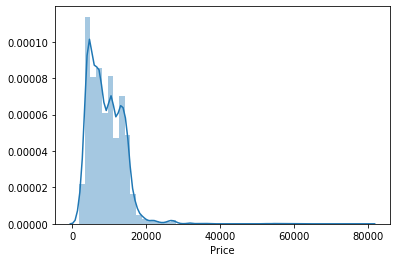

In [24]:
# Our Dependent Variable Price is not normally distributed therefore would have to apply scaling

sns.distplot(dftr['Price'])

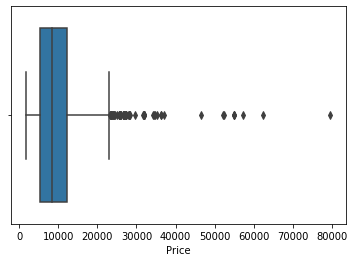

In [25]:
sns.boxplot(dftr['Price'])

In [26]:
dftr[dftr['Price']>75000]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Year,Month,Date,Dur_hours,Dur_min
2924,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,1 stop,Business class,79512,2019,1,3,5.0,40.0


In [27]:
dftr[dftr['Airline'] == 'Jet Airways Business']

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Year,Month,Date,Dur_hours,Dur_min
657,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,05:45,10:45,1 stop,No info,52229,2019,1,3,5.0,0.0
2924,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,1 stop,Business class,79512,2019,1,3,5.0,40.0
5372,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,1 stop,Business class,62427,2019,1,3,6.0,40.0
7351,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 04 Mar,2 stops,No info,46490,2019,3,3,8.0,20.0
9715,Jet Airways Business,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 07 Mar,2 stops,No info,52285,2019,6,3,8.0,20.0
10364,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,1 stop,Business class,57209,2019,1,3,4.0,40.0


In [28]:
# Applying log transformation to our Dependent Variable Price to make it normalize

dftr['Price'] = np.log(dftr['Price'])

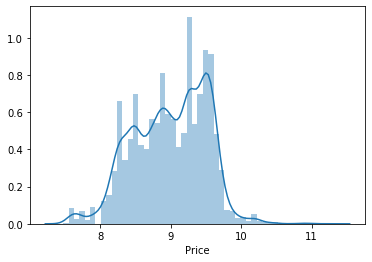

In [29]:
sns.distplot(dftr['Price'])

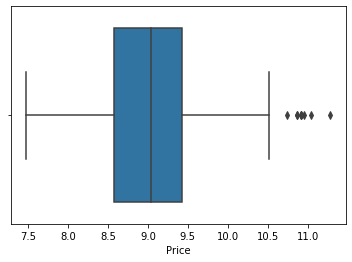

In [30]:
sns.boxplot(dftr['Price'])

In [31]:
# Adding Dep_hour and Dep_min column to dftr dataframe

dftr["Dep_hour"] = pd.to_datetime(dftr["Dep_Time"]).dt.hour
dftr["Dep_min"] = pd.to_datetime(dftr["Dep_Time"]).dt.minute

In [32]:
dftr.drop(["Dep_Time"], axis = 1, inplace = True)

In [33]:
dftr.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Year,Month,Date,Dur_hours,Dur_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,8.267962,2019,3,24,2.0,50.0,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,8.944028,2019,1,5,7.0,25.0,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,No info,9.538348,2019,9,6,19.0,0.0,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1 stop,No info,8.735204,2019,12,5,5.0,25.0,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1 stop,No info,9.495670,2019,1,3,4.0,45.0,16,50


In [34]:
# Adding Arrival_hour and Arrival_min column to dftr dataframe

dftr["Arrival_hour"] = pd.to_datetime(dftr["Arrival_Time"]).dt.hour
dftr["Arrival_min"] = pd.to_datetime(dftr["Arrival_Time"]).dt.minute

In [35]:
dftr.drop(["Arrival_Time"], axis = 1, inplace = True)

In [36]:
dftr.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Year,Month,Date,Dur_hours,Dur_min,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,8.267962,2019,3,24,2.0,50.0,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,8.944028,2019,1,5,7.0,25.0,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,9.538348,2019,9,6,19.0,0.0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,8.735204,2019,12,5,5.0,25.0,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,9.495670,2019,1,3,4.0,45.0,16,50,21,35


In [37]:
# Additional_Info contains almost 80% no_info
# Also, the Routes and Total_Stops are related to each other

dftr.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [38]:
dftr.head()

,Airline,Source,Destination,Total_Stops,Price,Year,Month,Date,Dur_hours,Dur_min,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,non-stop,8.267962,2019,3,24,2.0,50.0,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,8.944028,2019,1,5,7.0,25.0,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,9.538348,2019,9,6,19.0,0.0,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,8.735204,2019,12,5,5.0,25.0,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,9.495670,2019,1,3,4.0,45.0,16,50,21,35


In [39]:
# The Total_Stops is an Ordinal Categorical type therefore we perform LabelEncoder

dftr.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [40]:
dftr.head()

,Airline,Source,Destination,Total_Stops,Price,Year,Month,Date,Dur_hours,Dur_min,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,0,8.267962,2019,3,24,2.0,50.0,22,20,1,10
1,Air India,Kolkata,Banglore,2,8.944028,2019,1,5,7.0,25.0,5,50,13,15
2,Jet Airways,Delhi,Cochin,2,9.538348,2019,9,6,19.0,0.0,9,25,4,25
3,IndiGo,Kolkata,Banglore,1,8.735204,2019,12,5,5.0,25.0,18,5,23,30
4,IndiGo,Banglore,New Delhi,1,9.495670,2019,1,3,4.0,45.0,16,50,21,35


# Dealing with Categorical Data

In [147]:
dftr['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       695
Chennai      381
Name: Source, dtype: int64

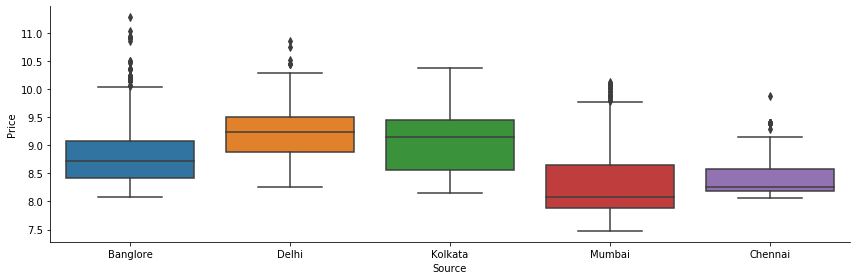

In [146]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = dftr.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

In [41]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = dftr[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [148]:
dftr['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     695
Kolkata       381
Name: Destination, dtype: int64

In [42]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = dftr[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first= True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


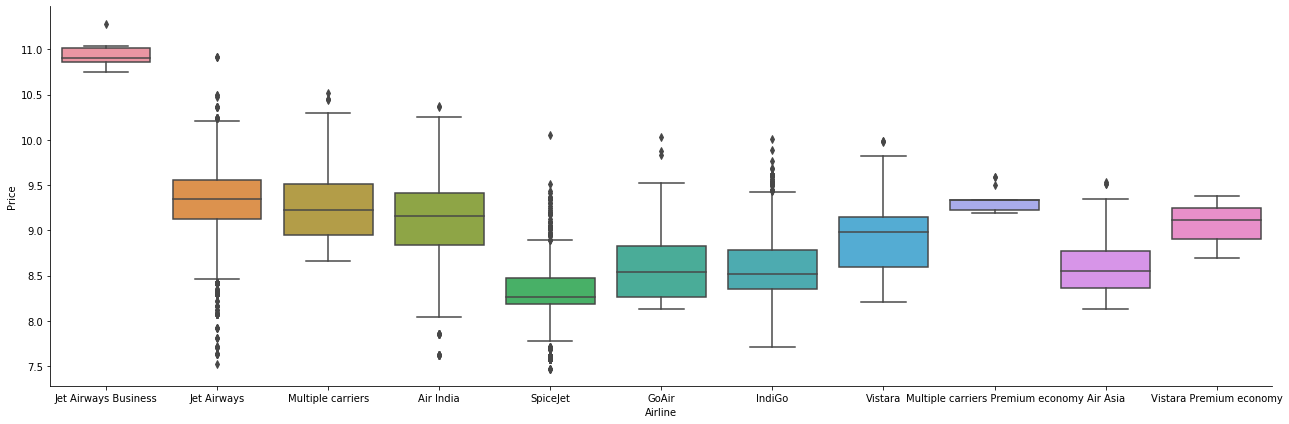

In [144]:
#Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = dftr.sort_values("Price", ascending = False), kind="box", height = 6, aspect = 3)
plt.show()

# From graph, it is clear that Jet Airways Business have the highest Price.
# Apart from that almost all are having similar median

In [149]:
dftr['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Name: Airline, dtype: int64

In [43]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = dftr[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [44]:
dftr.head()

,Airline,Source,Destination,Total_Stops,Price,Year,Month,Date,Dur_hours,Dur_min,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,0,8.267962,2019,3,24,2.0,50.0,22,20,1,10
1,Air India,Kolkata,Banglore,2,8.944028,2019,1,5,7.0,25.0,5,50,13,15
2,Jet Airways,Delhi,Cochin,2,9.538348,2019,9,6,19.0,0.0,9,25,4,25
3,IndiGo,Kolkata,Banglore,1,8.735204,2019,12,5,5.0,25.0,18,5,23,30
4,IndiGo,Banglore,New Delhi,1,9.495670,2019,1,3,4.0,45.0,16,50,21,35


In [45]:
# Concatenating dataframe -> Dftr + Airline + Source + Destination

dftr1 = pd.concat([dftr, Airline, Source, Destination], axis = 1)

In [46]:
dftr1.head()

,Airline,Source,Destination,Total_Stops,Price,Year,Month,Date,Dur_hours,Dur_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,8.267962,2019,3,24,2.0,50.0,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,8.944028,2019,1,5,7.0,25.0,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,9.538348,2019,9,6,19.0,0.0,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,8.735204,2019,12,5,5.0,25.0,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,9.495670,2019,1,3,4.0,45.0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
dftr1.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [48]:
dftr1.head()

,Total_Stops,Price,Year,Month,Date,Dur_hours,Dur_min,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,8.267962,2019,3,24,2.0,50.0,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,2,8.944028,2019,1,5,7.0,25.0,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,2,9.538348,2019,9,6,19.0,0.0,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,1,8.735204,2019,12,5,5.0,25.0,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,1,9.495670,2019,1,3,4.0,45.0,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [49]:
dftr.drop(["Year"], axis=1, inplace=True)
dftr1.drop(["Year"], axis=1, inplace=True)

In [50]:
dftr1.shape

(10680, 29)

# Test Data
**Similar Data Cleaning Process will be followed for the Test Dataset**

In [51]:
dfts = pd.read_excel('Test_set.xlsx')

In [52]:
dfts.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [53]:
dfts.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [54]:
dfts.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops
0,Jet Airways,6/06/2019,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop
1,IndiGo,12/05/2019,Kolkata,Banglore,06:20,10:20,4h,1 stop
2,Jet Airways,21/05/2019,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1 stop
3,Multiple carriers,21/05/2019,Delhi,Cochin,08:00,21:00,13h,1 stop
4,Air Asia,24/06/2019,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,non-stop


In [55]:
dfts.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [56]:
dfts.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops
0,Jet Airways,6/06/2019,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1
1,IndiGo,12/05/2019,Kolkata,Banglore,06:20,10:20,4h,1
2,Jet Airways,21/05/2019,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1
3,Multiple carriers,21/05/2019,Delhi,Cochin,08:00,21:00,13h,1
4,Air Asia,24/06/2019,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,0


In [57]:
dfts['Year'] = pd.to_datetime(dfts['Date_of_Journey']).dt.year
dfts['Month'] = pd.to_datetime(dfts['Date_of_Journey']).dt.month
dfts['Date'] = pd.to_datetime(dfts['Date_of_Journey']).dt.day

In [58]:
dfts.drop(['Date_of_Journey'], axis=1,inplace=True)

In [59]:
dfts.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Year,Month,Date
0,Jet Airways,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1,2019,6,6
1,IndiGo,Kolkata,Banglore,06:20,10:20,4h,1,2019,12,5
2,Jet Airways,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1,2019,5,21
3,Multiple carriers,Delhi,Cochin,08:00,21:00,13h,1,2019,5,21
4,Air Asia,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,0,2019,6,24


In [60]:
dfts["Dep_hour"] = pd.to_datetime(dfts["Dep_Time"]).dt.hour
dfts["Dep_min"] = pd.to_datetime(dfts["Dep_Time"]).dt.minute

In [61]:
dfts["Arrival_hour"] = pd.to_datetime(dfts["Arrival_Time"]).dt.hour
dfts["Arrival_min"] = pd.to_datetime(dfts["Arrival_Time"]).dt.minute

In [62]:
dfts.drop(['Dep_Time', 'Arrival_Time'], axis=1, inplace=True)

In [63]:
dfts.head()

,Airline,Source,Destination,Duration,Total_Stops,Year,Month,Date,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,10h 55m,1,2019,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,4h,1,2019,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,23h 45m,1,2019,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,13h,1,2019,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,2h 50m,0,2019,6,24,23,55,2,45


In [64]:
dfts[dfts['Duration']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Year,Month,Date,Dep_hour,Dep_min,Arrival_hour,Arrival_min
2660,Air India,Mumbai,Hyderabad,5m,2,2019,12,3,16,50,16,55


In [65]:
dfts.drop([2660,],axis=0,inplace=True)

In [66]:
dfts.head()

,Airline,Source,Destination,Duration,Total_Stops,Year,Month,Date,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,10h 55m,1,2019,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,4h,1,2019,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,23h 45m,1,2019,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,13h,1,2019,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,2h 50m,0,2019,6,24,23,55,2,45


In [67]:
dfts['Dur_hours'] = dfts['Duration'].str.split(' ').str[0]
dfts['Dur_hours'] = dfts['Dur_hours'].str.replace('h','').astype(float)
dfts['Dur_hours'].fillna(0, inplace=True) 

dfts['Dur_min'] = dfts['Duration'].str.split(' ').str[1]
dfts['Dur_min'] = dfts['Dur_min'].str.replace('m','').astype(float)
dfts['Dur_min'].fillna(0, inplace=True)

In [68]:
dfts.drop(['Duration'],axis=1,inplace=True)

In [69]:
dfts.head()

,Airline,Source,Destination,Total_Stops,Year,Month,Date,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Dur_hours,Dur_min
0,Jet Airways,Delhi,Cochin,1,2019,6,6,17,30,4,25,10.0,55.0
1,IndiGo,Kolkata,Banglore,1,2019,12,5,6,20,10,20,4.0,0.0
2,Jet Airways,Delhi,Cochin,1,2019,5,21,19,15,19,0,23.0,45.0
3,Multiple carriers,Delhi,Cochin,1,2019,5,21,8,0,21,0,13.0,0.0
4,Air Asia,Banglore,Delhi,0,2019,6,24,23,55,2,45,2.0,50.0


In [70]:
Source = dfts[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [71]:
Destination = dfts[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first= True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [72]:
Airline = dfts[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [73]:
dfts1 = pd.concat([dfts, Airline, Source, Destination], axis = 1)

In [74]:
dfts1.head()

,Airline,Source,Destination,Total_Stops,Year,Month,Date,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1,2019,6,6,17,30,4,...,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,2019,12,5,6,20,10,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,2019,5,21,19,15,19,...,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,2019,5,21,8,0,21,...,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,2019,6,24,23,55,2,...,0,0,0,0,0,0,1,0,0,0


In [75]:
dfts1.drop(["Airline", "Source", "Destination","Year"], axis = 1, inplace = True)

In [76]:
dfts1.head()

,Total_Stops,Month,Date,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Dur_hours,Dur_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10.0,55.0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4.0,0.0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,5,21,19,15,19,0,23.0,45.0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,5,21,8,0,21,0,13.0,0.0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,6,24,23,55,2,45,2.0,50.0,0,...,0,0,0,0,0,0,1,0,0,0


In [77]:
dfts1.head()

,Total_Stops,Month,Date,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Dur_hours,Dur_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10.0,55.0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4.0,0.0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,5,21,19,15,19,0,23.0,45.0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,5,21,8,0,21,0,13.0,0.0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,6,24,23,55,2,45,2.0,50.0,0,...,0,0,0,0,0,0,1,0,0,0


# Model Building - Linear Regression

In [78]:
dftr1.columns

Index(['Total_Stops', 'Price', 'Month', 'Date', 'Dur_hours', 'Dur_min',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [79]:
X = dftr1.loc[:, ['Total_Stops', 'Date', 'Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Dur_hours',
       'Dur_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Dur_hours,Dur_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2.0,50.0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,5,1,5,50,13,15,7.0,25.0,1,...,0,0,0,1,0,0,0,0,0,0
2,2,6,9,9,25,4,25,19.0,0.0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,5,12,18,5,23,30,5.0,25.0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,3,1,16,50,21,35,4.0,45.0,0,...,0,0,0,0,0,0,0,0,0,1


In [80]:
y = dftr1.iloc[:, 1]
y.head()

0    8.267962
1    8.944028
2    9.538348
3    8.735204
4    9.495670
Name: Price, dtype: float64

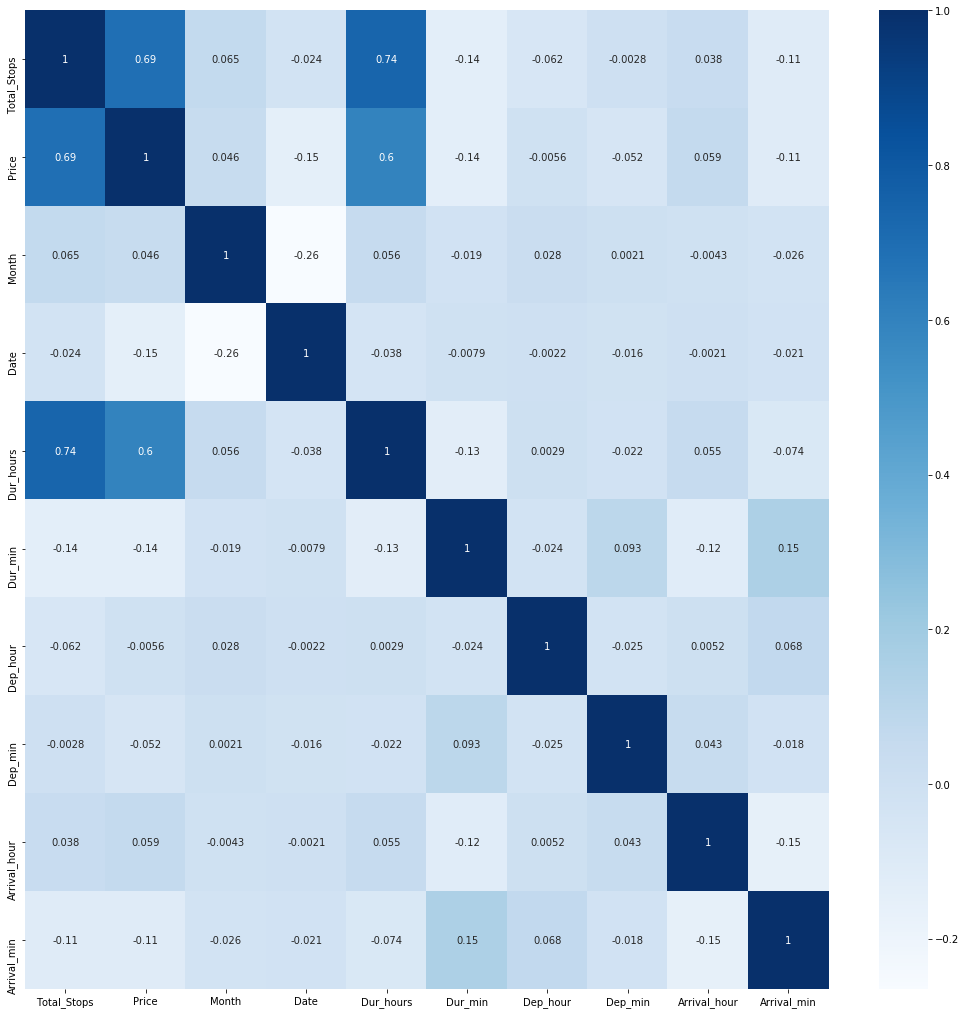

In [81]:
plt.figure(figsize = (18,18))
sns.heatmap(dftr.corr(), annot = True, cmap = "Blues")

plt.show()

In [82]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [83]:
from sklearn.linear_model import LinearRegression    
regressor = LinearRegression()    
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
y_pred = regressor.predict(X_test)

In [85]:
y_pred

array([9.38519885, 9.27298574, 8.1336128 , ..., 8.43281566, 8.1668542 ,
       9.2841413 ])

In [108]:
y_pred = np.exp(y_pred)
y_pred

array([13961.27046634, 14728.93096259,  3581.70305287, ...,
        5140.30537636,  2794.44806737, 10437.3670712 ])

In [109]:
y_test = np.exp(y_test)
y_test

5880     10262.0
6137     11399.0
7700      3597.0
1437     16757.0
8480      4409.0
          ...   
9454     12954.0
6391      3943.0
9273      4804.0
5381      2754.0
10037     9663.0
Name: Price, Length: 2136, dtype: float64

In [110]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [111]:
df1.head()

,Actual,Predicted
5880,10262.0,13961.270466
6137,11399.0,14728.930963
7700,3597.0,3581.703053
1437,16757.0,15834.259319
8480,4409.0,4260.668918


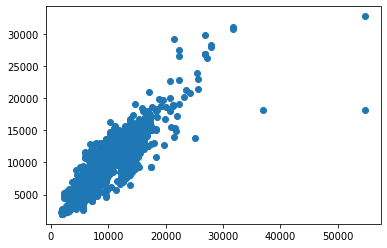

In [112]:
plt.scatter(df1['Actual'], df1['Predicted'])

In [113]:
from sklearn import metrics
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Squared Error: 4356950.745505068
Mean Absolute Error: 1216.2807967702672


In [114]:
from sklearn.metrics import r2_score

In [115]:
r2_score(y_test,y_pred)

0.8027877487165886

# Building Random Forest Model

In [130]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [131]:
y_pred = reg_rf.predict(X_test)

In [132]:
y_pred = np.exp(y_pred)
y_pred

array([14388.01857743, 14484.72820756,  3594.571057  , ...,
        5241.69563359,  2814.42999237, 10867.4816294 ])

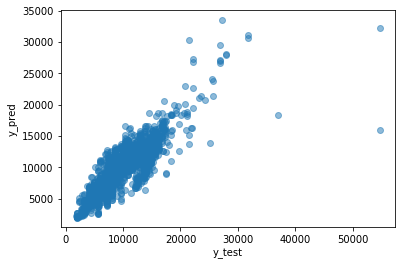

In [119]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [133]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head()

,Actual,Predicted
5880,10262.0,14388.018577
6137,11399.0,14484.728208
7700,3597.0,3594.571057
1437,16757.0,14216.025477
8480,4409.0,4215.863074


In [134]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1220.2151726813672
MSE: 4345508.330958291
RMSE: 2084.5882881178936


In [135]:
metrics.r2_score(y_test, y_pred)

0.8033056761536194

# Applying the Linear Model to Test Dataset

In [123]:
dfts1.columns

Index(['Total_Stops', 'Month', 'Date', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Dur_hours', 'Dur_min', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [124]:
dfts1.head()

,Total_Stops,Month,Date,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Dur_hours,Dur_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10.0,55.0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4.0,0.0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,5,21,19,15,19,0,23.0,45.0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,5,21,8,0,21,0,13.0,0.0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,6,24,23,55,2,45,2.0,50.0,0,...,0,0,0,0,0,0,1,0,0,0


In [125]:
dfts1.shape

(2670, 28)

In [126]:
X_train.shape

(8544, 28)

In [127]:
y_pred1 = regressor.predict(dfts1)

In [128]:
y_pred1

array([9.35774256, 8.81610922, 9.30867132, ..., 9.3677262 , 9.09971267,
       9.23729902])

In [129]:
y_pred1 = np.exp(y_pred1)
y_pred1

array([11588.19938024,  6741.98197559, 11033.27873893, ...,
       11704.47117491,  8952.71992664, 10273.25320391])